In [57]:
import pandas as pd 
data = pd.read_csv('data.csv')
data


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,206,52,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,3,0,0,...,128,106,37,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,2,0,0,0,0,0,0,0,0,0,...,0,0,4,129,72,18,0,0,0,0
69997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,77,56,2,0,0,0,0


In [58]:
data.describe ()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4.500000,0.000829,0.006743,0.037729,0.098371,0.242343,0.402571,0.808757,2.215843,5.649971,...,34.581886,23.268000,16.565943,17.86960,22.821271,17.894157,8.496757,2.723057,0.823229,0.069586
std,2.872302,0.088152,0.319931,1.472886,2.419523,4.360495,5.811048,8.269954,14.231137,23.754212,...,57.594114,48.882093,42.005114,43.99069,51.812432,45.146046,29.494913,17.261065,9.110774,2.099525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,45.000000,226.000000,185.000000,227.000000,230.000000,247.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [59]:
x = data.iloc[:,1:].values
y = data['label'].values

In [60]:
def kmeans_euclidean(X, k, max_iters=10):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X - centroids[:, np.newaxis], axis=2), axis=0)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


In [61]:
import numpy as np

def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def kmeans_cosine(X, k, max_iters=10):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmax([cosine_similarity(x, centroids.T) for x in X], axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [62]:
#labels4, centroids = kmeans_euclidean(x, 4)
#from sklearn.metrics import normalized_mutual_info_score
#nmi_score = normalized_mutual_info_score(y, labels4)
#print(f"Normalized Mutual Information Score: {nmi_score}")

In [63]:
#labels4c, centroids = kmeans_cosine(x, 4)
#from sklearn.metrics import normalized_mutual_info_score
#nmi_score = normalized_mutual_info_score(y, labels4c)
#print(f"Normalized Mutual Information Score: {nmi_score}")

### PCA into 32 Components

In [64]:
# Assuming 'x' is your NumPy array
nan_rows = np.any(np.isnan(x), axis=1)  # Identify rows with NaN values
x1 = x[~nan_rows]

from sklearn.decomposition import PCA
pca = PCA(n_components=32)
x_pca = pca.fit_transform(x1)

### Clustering into 4,6,10 clusters using Euclidean and Cosine metric

In [65]:
labels4, centroids = kmeans_euclidean(x_pca, 4)
from sklearn.metrics import normalized_mutual_info_score
nmi_score = normalized_mutual_info_score(y, labels4)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.3950019796526743


In [66]:
labels4c, centroids = kmeans_cosine(x_pca, 4)
nmi_score = normalized_mutual_info_score(y, labels4c)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.3990455006491219


In [67]:
labels6, centroids = kmeans_euclidean(x_pca, 6)
nmi_score = normalized_mutual_info_score(y, labels6)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.44361932512224966


In [68]:
labels6c, centroids = kmeans_cosine(x_pca, 6)
nmi_score = normalized_mutual_info_score(y, labels6c)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.43489462687101926


In [69]:
labels10, centroids = kmeans_euclidean(x_pca, 10)
nmi_score = normalized_mutual_info_score(y, labels10)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.5048741210048803


In [70]:
labels10c, centroids = kmeans_cosine(x_pca, 10)
nmi_score = normalized_mutual_info_score(y, labels10c)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.521956408222992


### Clustering using Sklearn Model

In [71]:
from sklearn.cluster import KMeans
km4 = KMeans(n_clusters = 4)
y_predict4 = km4.fit_predict(x_pca)

nmi_score = normalized_mutual_info_score(y, y_predict4)
print(f"Normalized Mutual Information Score: {nmi_score}")

C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Normalized Mutual Information Score: 0.3978272420514766


In [72]:
from sklearn.cluster import KMeans
km6 = KMeans(n_clusters = 6)
y_predict6 = km6.fit_predict(x_pca)

nmi_score = normalized_mutual_info_score(y, y_predict6)
print(f"Normalized Mutual Information Score: {nmi_score}")

C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Normalized Mutual Information Score: 0.4747308811451631


In [73]:
from sklearn.cluster import KMeans
km10 = KMeans(n_clusters = 10)
y_predict10 = km10.fit_predict(x_pca)

nmi_score = normalized_mutual_info_score(y, y_predict10)
print(f"Normalized Mutual Information Score: {nmi_score}")

C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Normalized Mutual Information Score: 0.5118738783110723


In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

wcss = list()
nmi_euc = list()
nmi_cos = list()

for i in range(1, 20):
    # KMeans with Euclidean distance
    km = KMeans(n_clusters=i)
    km.fit_predict(x_pca)
    wcss.append(km.inertia_)

    labels_euc, _ = kmeans_euclidean(x_pca, i)
    nmi_score_euc = normalized_mutual_info_score(y, labels_euc)
    nmi_euc.append(nmi_score_euc)

    # KMeans with Cosine distance
    labels_cos, _ = kmeans_cosine(x_pca, i)
    nmi_score_cos = normalized_mutual_info_score(y, labels_cos)
    nmi_cos.append(nmi_score_cos)

C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

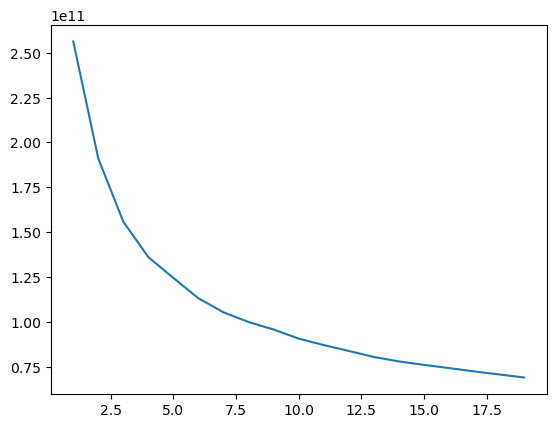

In [87]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),wcss)
plt.show()

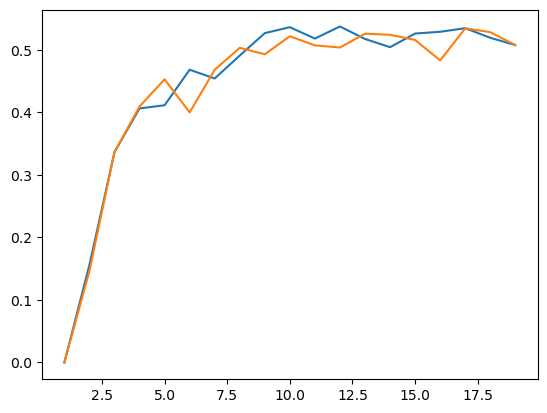

In [86]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),nmi_euc)
plt.plot(range(1,20),nmi_cos)
# Show the plot
plt.show()

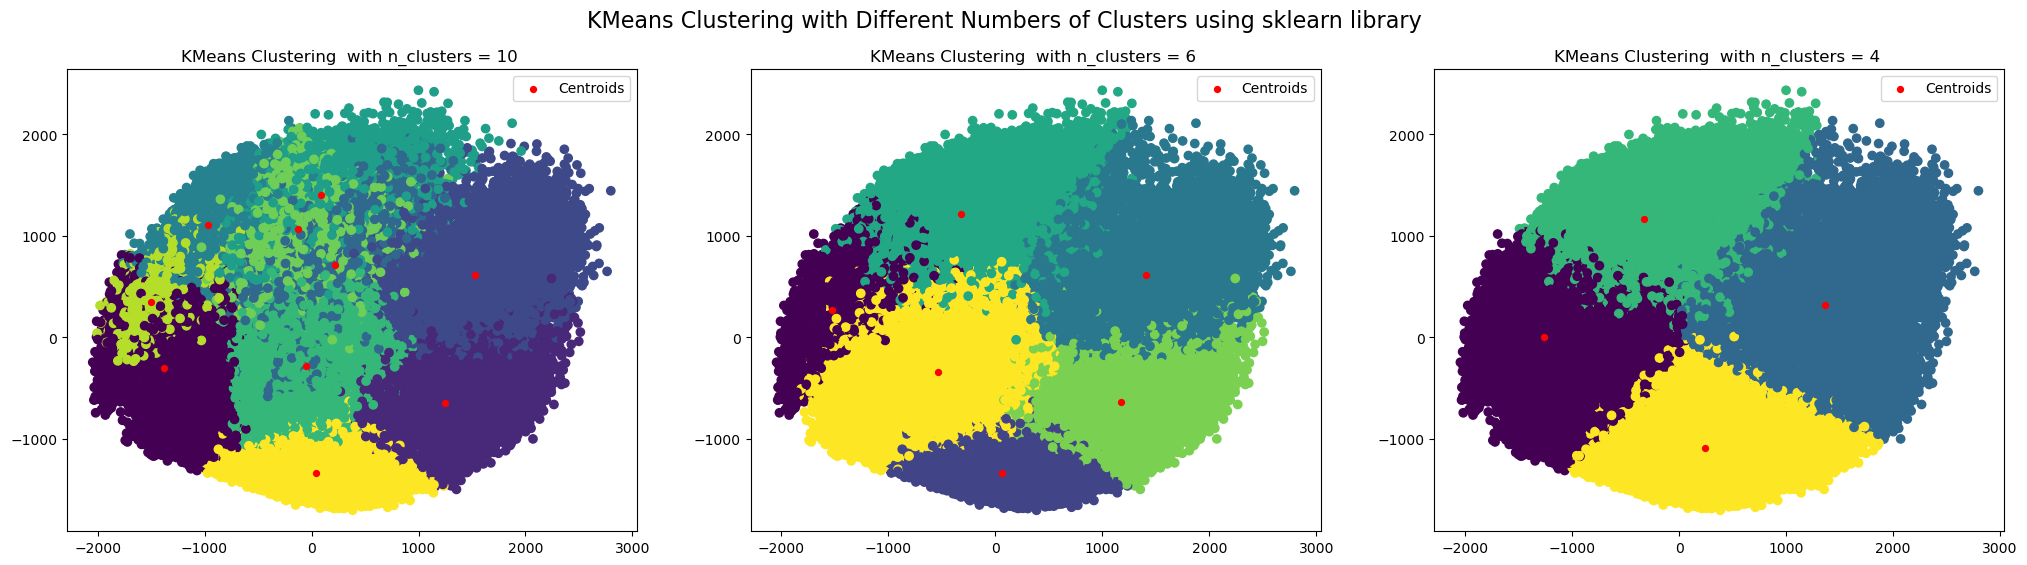

In [88]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot KMeans clustering
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle('KMeans Clustering with Different Numbers of Clusters using sklearn library', fontsize=16)
ax1.scatter(x_pca[:, 0], x_pca[:, 1], c=y_predict10)
ax1.scatter(km10.cluster_centers_[:, 0], km10.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax1.set_title('KMeans Clustering  with n_clusters = 10 ')
ax1.legend()

ax2.scatter(x_pca[:, 0], x_pca[:, 1], c=y_predict6)
ax2.scatter(km6.cluster_centers_[:, 0], km6.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax2.set_title('KMeans Clustering  with n_clusters = 6 ')
ax2.legend()

ax3.scatter(x_pca[:, 0], x_pca[:, 1], c=y_predict4)
ax3.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax3.set_title('KMeans Clustering  with n_clusters = 4 ')
ax3.legend()
plt.show()

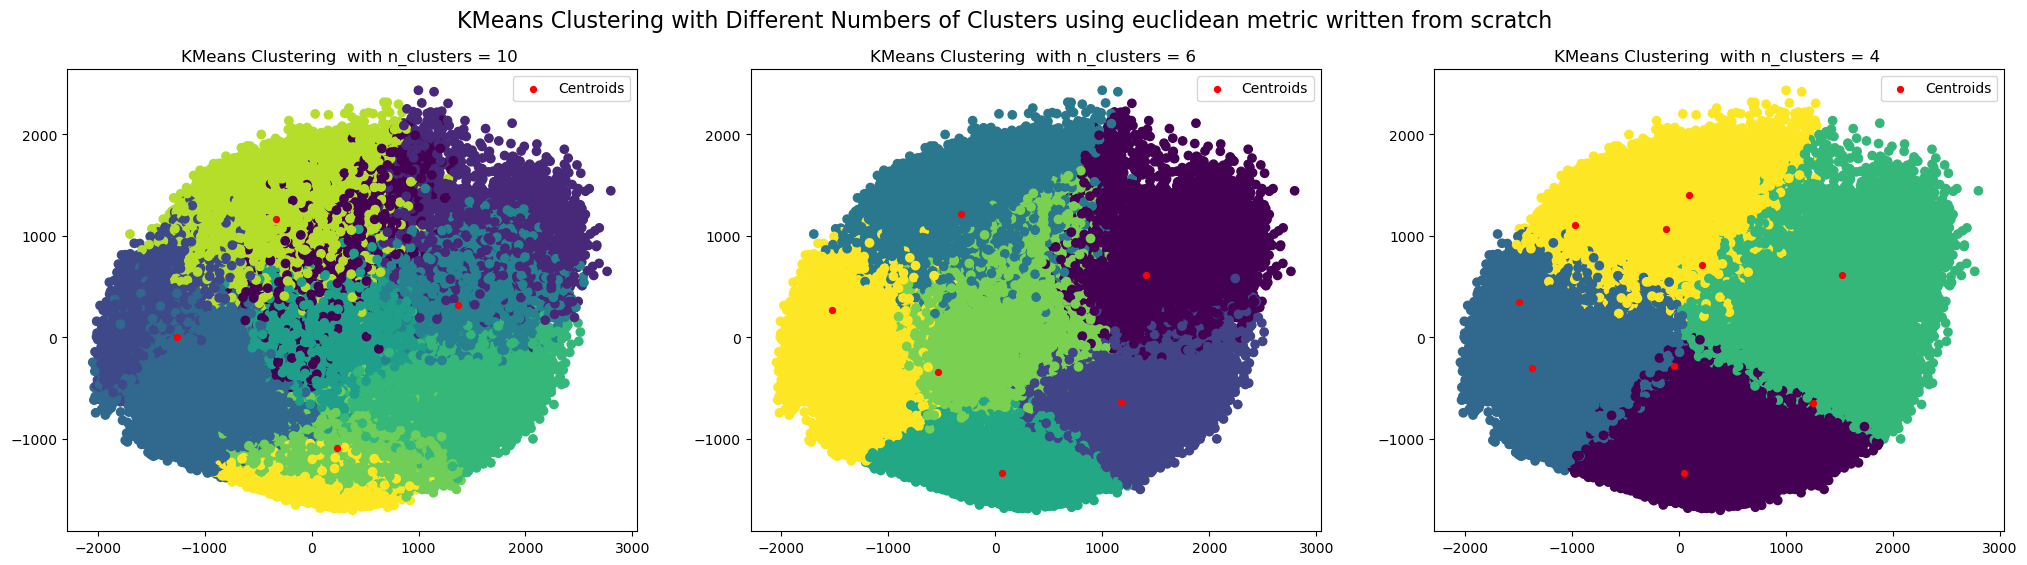

In [94]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot KMeans clustering
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle('KMeans Clustering with Different Numbers of Clusters using euclidean metric written from scratch', fontsize=16)

ax1.scatter(x_pca[:, 0], x_pca[:, 1], c=labels10)
ax1.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax1.set_title('KMeans Clustering  with n_clusters = 10 ')
ax1.legend()

ax2.scatter(x_pca[:, 0], x_pca[:, 1], c=labels6)
ax2.scatter(km6.cluster_centers_[:, 0], km6.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax2.set_title('KMeans Clustering  with n_clusters = 6 ')
ax2.legend()

ax3.scatter(x_pca[:, 0], x_pca[:, 1], c=labels4)
ax3.scatter(km10.cluster_centers_[:, 0], km10.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax3.set_title('KMeans Clustering  with n_clusters = 4 ')
ax3.legend()


plt.show()

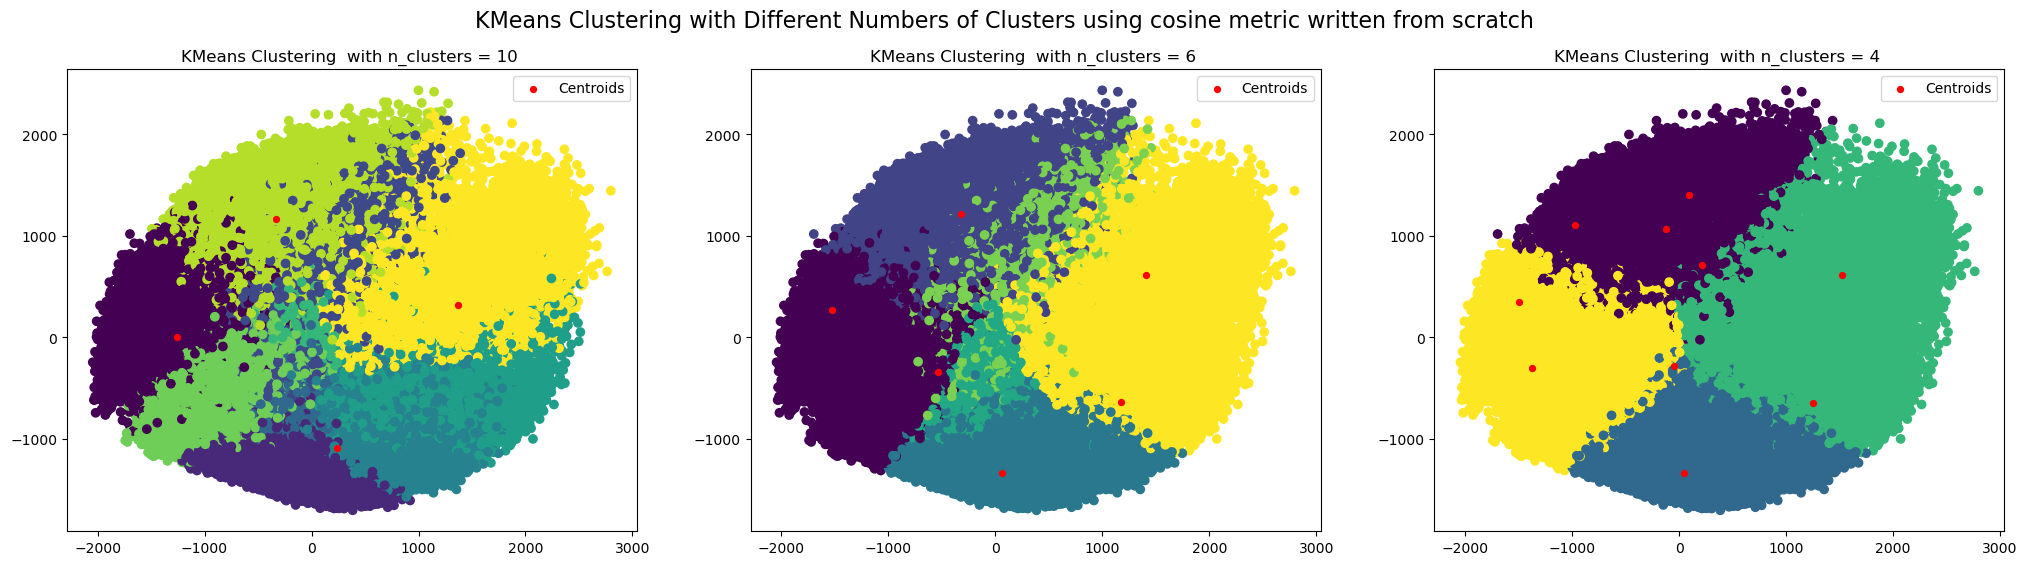

In [95]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plot KMeans clustering
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle('KMeans Clustering with Different Numbers of Clusters using cosine metric written from scratch', fontsize=16)

ax1.scatter(x_pca[:, 0], x_pca[:, 1], c=labels10c)
ax1.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax1.set_title('KMeans Clustering  with n_clusters = 10 ')
ax1.legend()

ax2.scatter(x_pca[:, 0], x_pca[:, 1], c=labels6c)
ax2.scatter(km6.cluster_centers_[:, 0], km6.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax2.set_title('KMeans Clustering  with n_clusters = 6 ')
ax2.legend()

ax3.scatter(x_pca[:, 0], x_pca[:, 1], c=labels4c)
ax3.scatter(km10.cluster_centers_[:, 0], km10.cluster_centers_[:, 1], marker='.', s=20, linewidths=3, color='r', label='Centroids')
ax3.set_title('KMeans Clustering  with n_clusters = 4 ')
ax3.legend()


plt.show()

In [102]:
x_pca.shape

(70000, 32)

In [103]:
y.shape

(70000,)

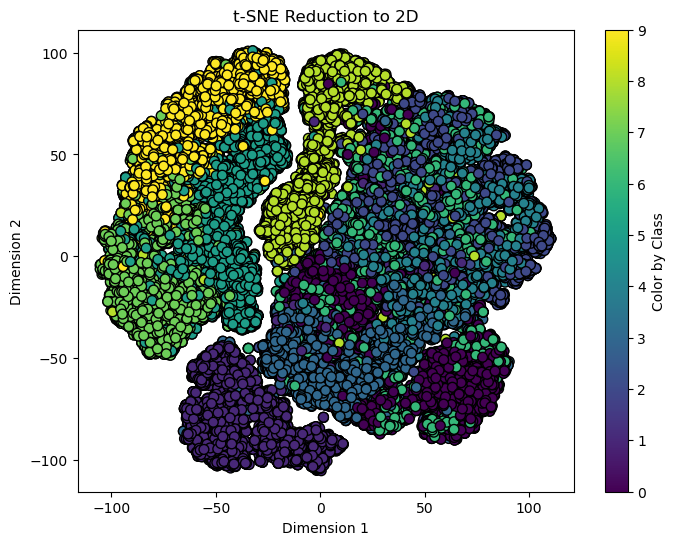

In [100]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'x_pca' is your data
# Replace it with your actual data

# Create a TSNE instance with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to 2D using t-SNE
x_tsne = tsne.fit_transform(x_pca)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.title('t-SNE Reduction to 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Color by Class')
plt.show()

In [96]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x1)

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
y_kmeans_tsne = kmeans.fit_predict(x_tsne)

from sklearn.metrics import normalized_mutual_info_score
nmi_score = normalized_mutual_info_score(y, y_kmeans_tsne)
print(f"Normalized Mutual Information Score: {nmi_score}")

C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Normalized Mutual Information Score: 0.4849667419415647


In [98]:
labels4_t, centroids = kmeans_euclidean(x_tsne, 4)
from sklearn.metrics import normalized_mutual_info_score
nmi_score = normalized_mutual_info_score(y, labels4_t)
print(f"Normalized Mutual Information Score: {nmi_score}")

Normalized Mutual Information Score: 0.4520470386291274
